<a href="https://colab.research.google.com/github/Ajay176854/Ajay/blob/main/NLP_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
print(os.listdir('/content/'))

['.config', 'WhatsApp Chat with Tamil AI Data Science Community .txt', 'sample_data']


In [21]:
with open('WhatsApp Chat with Tamil AI Data Science Community .txt', 'r', encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

2/26/25, 8:25 PM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.

2/6/25, 11:45 AM - ~ Thiru created group "Tamil AI Data Science Community "

2/26/25, 8:25 PM - You joined using this group's invite link

2/26/25, 8:31 PM - +91 75503 62274: Bro data analytics roadmap sollunga bro

2/26/25, 8:31 PM - +91 63806 54780: Will post bro

2/26/25, 8:38 PM - ~ Regadharani was added

2/26/25, 8:37 PM - +91 63694 76213 joined using a group link.

2/26/25, 9:21 PM - ~ Harish was added

2/26/25, 9:21 PM - +91 88259 44697 joined using a group link.

2/26/25, 9:23 PM - +91 88259 44697: I have some doubt in my ML project..shall I clarify here ?



In [22]:
import re

def parse_whatsapp_line(line):
    pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s?[AP]M)\s-\s(.*?):\s(.*)"
    match = re.match(pattern, line)
    if match:
        timestamp, sender, message = match.groups()
        return {'timestamp': timestamp, 'sender': sender, 'message': message}
    return None

messages = []
with open('WhatsApp Chat with Tamil AI Data Science Community .txt', 'r', encoding='utf-8') as f:
    for line in f:
        parsed_line = parse_whatsapp_line(line)
        if parsed_line:
            messages.append(parsed_line)

df = pd.DataFrame(messages)
display(df.head())

,timestamp,sender,message
0,"2/26/25, 8:31 PM",+91 75503 62274,Bro data analytics roadmap sollunga bro
1,"2/26/25, 8:31 PM",+91 63806 54780,Will post bro
2,"2/26/25, 9:23 PM",+91 88259 44697,I have some doubt in my ML project..shall I cl...
3,"2/26/25, 9:26 PM",+91 63806 54780,Yes
4,"2/26/25, 9:30 PM",+91 88259 44697,OBJECT DETECTION


In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (only need to do this once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt_tab') # Add download for punkt_tab
except LookupError:
    nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

df['cleaned_message'] = df['message'].apply(clean_text)
display(df[['message', 'cleaned_message']].head())

,message,cleaned_message
0,Bro data analytics roadmap sollunga bro,bro data analytics roadmap sollunga bro
1,Will post bro,post bro
2,I have some doubt in my ML project..shall I cl...,doubt ml projectshall clarify
3,Yes,yes
4,OBJECT DETECTION,object detection


In [24]:
from collections import Counter
from nltk.util import ngrams

# Calculate word frequencies
words = ' '.join(df['cleaned_message']).split()
word_freq = Counter(words)

# Print the most common words
print("Most common words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Calculate bigram frequencies
bigrams = list(ngrams(words, 2))
bigram_freq = Counter(bigrams)

# Print the most common bigrams
print("\nMost common bigrams:")
for bigram, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bigram)}: {freq}")

# Calculate trigram frequencies
trigrams = list(ngrams(words, 3))
trigram_freq = Counter(trigrams)

# Print the most common trigrams
print("\nMost common trigrams:")
for trigram, freq in trigram_freq.most_common(20):
    print(f"{' '.join(trigram)}: {freq}")

Most common words:
bro: 606
media: 229
omitted: 229
ai: 217
use: 184
message: 165
data: 163
la: 128
guys: 108
anyone: 105
learning: 99
ok: 97
project: 94
learn: 91
ml: 89
deleted: 87
like: 85
need: 84
model: 84
one: 81

Most common bigrams:
media omitted: 229
message deleted: 87
omitted media: 81
message edited: 73
ok bro: 41
data science: 39
bro bro: 27
machine learning: 27
data analyst: 24
happy birthday: 22
ai ml: 21
yes bro: 17
thanks bro: 16
dont know: 16
final year: 16
hi guys: 16
bro media: 14
krish naik: 13
deep learning: 12
guys anyone: 12

Most common trigrams:
media omitted media: 81
omitted media omitted: 81
bro media omitted: 14
91 63806 54780: 12
message deleted media: 12
deleted media omitted: 12
bro happy birthday: 11
message deleted message: 10
deleted message deleted: 10
ai data science: 10
birthday bro happy: 9
happy birthday bro: 9
final year project: 8
amd ryzen 5: 7
media omitted message: 7
omitted message deleted: 7
ok bro bro: 6
bro message edited: 6
message del

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'cleaned_message' column
df['sentiment_score'] = df['cleaned_message'].apply(get_sentiment_score)

# Display the head of the DataFrame
display(df[['message', 'cleaned_message', 'sentiment_score']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,message,cleaned_message,sentiment_score
0,Bro data analytics roadmap sollunga bro,bro data analytics roadmap sollunga bro,0.0000
1,Will post bro,post bro,0.0000
2,I have some doubt in my ML project..shall I cl...,doubt ml projectshall clarify,-0.3612
3,Yes,yes,0.4019
4,OBJECT DETECTION,object detection,0.0000


In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon (only need to do this once)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')


# Instantiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'cleaned_message' column
df['sentiment_score'] = df['cleaned_message'].apply(get_sentiment_score)

# Display the head of the DataFrame
display(df[['message', 'cleaned_message', 'sentiment_score']].head())

,message,cleaned_message,sentiment_score
0,Bro data analytics roadmap sollunga bro,bro data analytics roadmap sollunga bro,0.0000
1,Will post bro,post bro,0.0000
2,I have some doubt in my ML project..shall I cl...,doubt ml projectshall clarify,-0.3612
3,Yes,yes,0.4019
4,OBJECT DETECTION,object detection,0.0000


Descriptive statistics for sentiment_score:


,sentiment_score
count,3294.000000
mean,0.125813
std,0.249339
min,-0.791000
25%,0.000000
50%,0.000000
75%,0.296000
max,0.964300


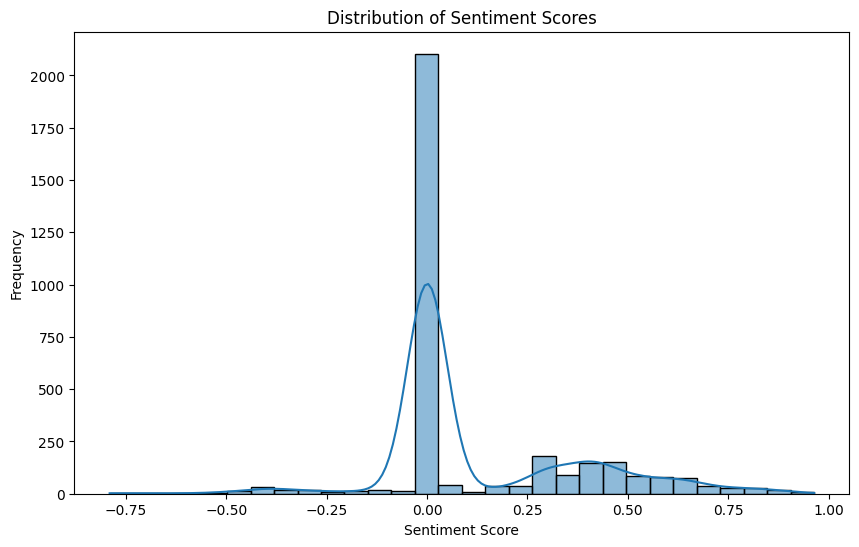


Percentage of messages in each sentiment category:


,count
sentiment_category,
Neutral,63.873710
Positive,31.754706
Negative,4.371585


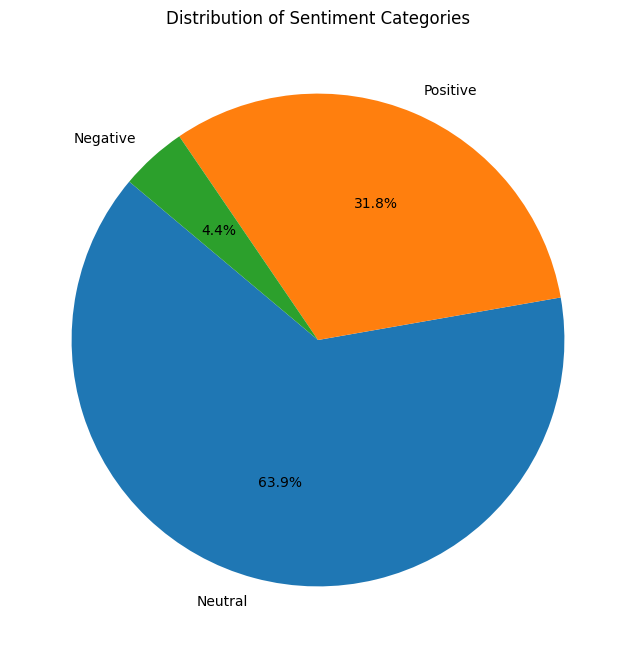

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display descriptive statistics
print("Descriptive statistics for sentiment_score:")
display(df['sentiment_score'].describe())

# 2. Create a histogram of the sentiment_score
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# 4. Calculate and display the percentage of messages in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_percentages = sentiment_counts / len(df) * 100

print("\nPercentage of messages in each sentiment category:")
display(sentiment_percentages)

# Optional: Visualize sentiment category distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Categories')
plt.show()

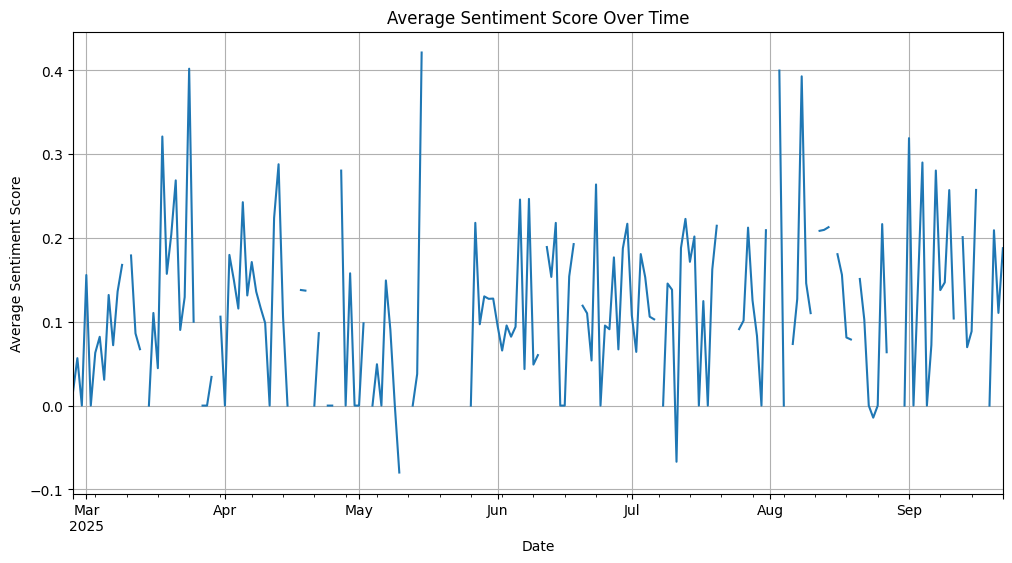

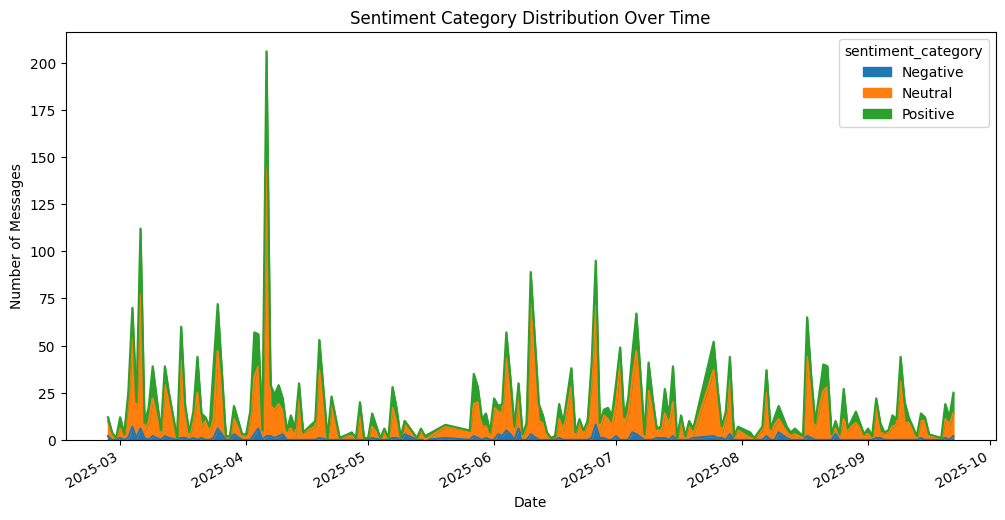

In [31]:
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %I:%M%p')

# Set timestamp as index for time series analysis
df_time = df.set_index('timestamp')

# Resample sentiment scores by day and calculate the mean
daily_sentiment = df_time['sentiment_score'].resample('D').mean()

format='mixed'
pd.to_datetime(df['timestamp'], format=format)

# Plot sentiment over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

# Optional: Resample sentiment counts by day
daily_sentiment_category_counts = df_time.groupby(pd.Grouper(freq='D'))['sentiment_category'].value_counts().unstack(fill_value=0)

# Plot sentiment category counts over time
daily_sentiment_category_counts.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Sentiment Category Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

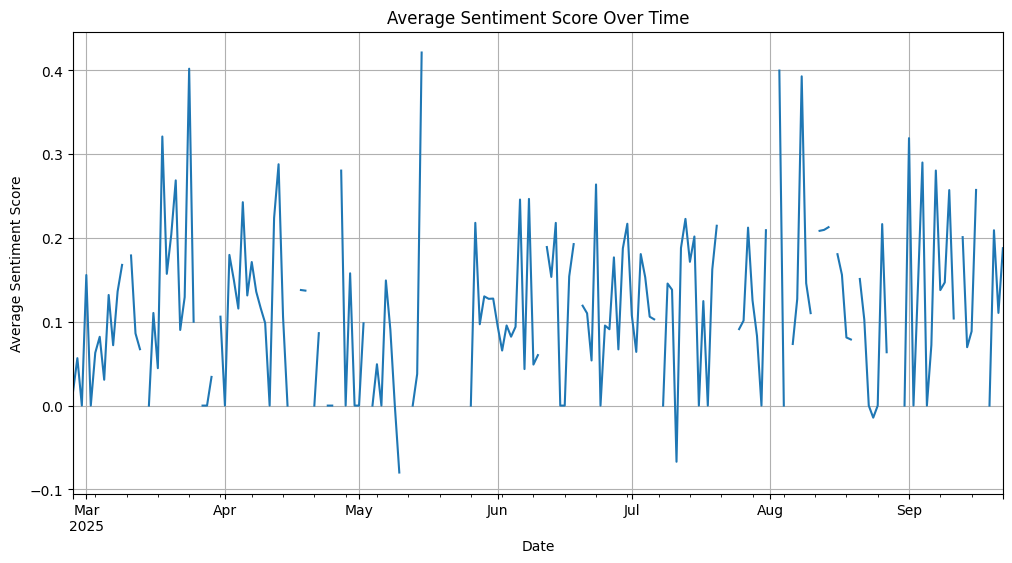

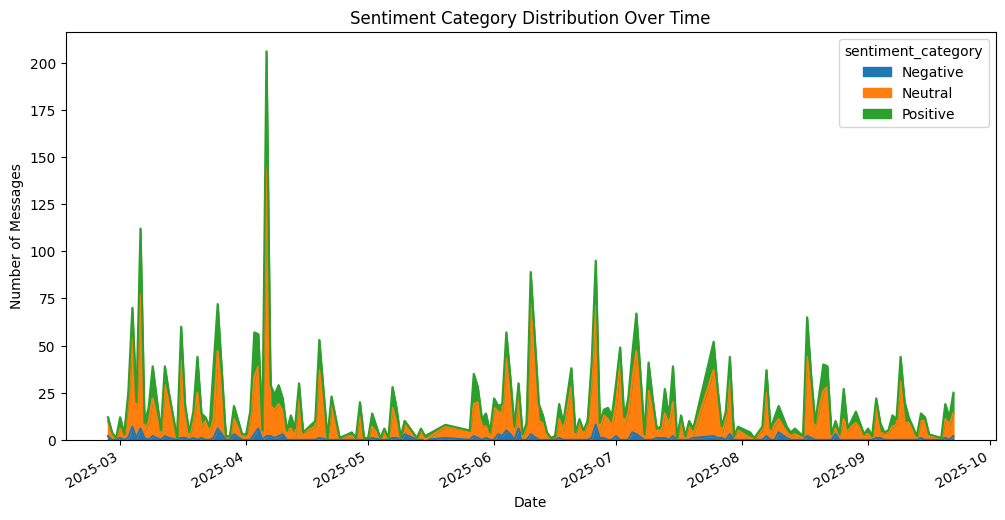

In [30]:
# Convert timestamp to datetime objects using 'mixed' format inference
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')

# Set timestamp as index for time series analysis
df_time = df.set_index('timestamp')

# Resample sentiment scores by day and calculate the mean
daily_sentiment = df_time['sentiment_score'].resample('D').mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

# Optional: Resample sentiment counts by day
daily_sentiment_category_counts = df_time.groupby(pd.Grouper(freq='D'))['sentiment_category'].value_counts().unstack(fill_value=0)

# Plot sentiment category counts over time
daily_sentiment_category_counts.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Sentiment Category Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.show()

In [32]:
import pickle

# Define the filename
pickle_filename = 'whatsapp_analysis.pkl'

# Create a dictionary with the variables to save
data_to_save = {
    'df': df,
    'daily_sentiment': daily_sentiment,
    'daily_sentiment_category_counts': daily_sentiment_category_counts
}

# Open the file in write-binary mode and save the data using pickle
with open(pickle_filename, 'wb') as f:
    pickle.dump(data_to_save, f)

print(f"Data saved successfully to {pickle_filename}")

Data saved successfully to whatsapp_analysis.pkl
